In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

trans_data = pd.read_csv('C://Users//ahsha//Downloads//paysim1//dataset.csv')
trans_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [3]:
import matplotlib.pyplot as plt
type(trans_data)
frauds = list(trans_data['isFraud'])
frauds

# print(frauds)
count_0 = 0
count_1 = 0
for i in frauds:
    if(i==0):
       count_0 += 1
    else:
        count_1 += 1
print(count_0)
print(count_1)
print('Percentage frauds:',count_1/count_0)

objects = ('Frauds', 'Non-Frauds')
y_pos = np.arange(len(objects))
performance = [count_1,count_0/100]
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Frauds')
plt.show()

6354407
8213
Percentage frauds: 0.0012924888191769902


<Figure size 640x480 with 1 Axes>

In [4]:
# the below data nad plot shows the distribution of the fraud transactions in the type of data

# types of fraud transactions
fraud_trans = list(trans_data.loc[trans_data.isFraud==1].type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_trans)

# plot for the same
# fraud_count = trans_data.groupby(['isFraud','type']).size().plot(kind='bar')

# removing the data which do not have fraudalant transactions
trans_data_new = trans_data.loc[(trans_data['type'].isin(['TRANSFER','CASH_OUT'])),:] 
trans_data_new

Types of transactions that have Frauds:  ['TRANSFER', 'CASH_OUT']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.00,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0


In [ ]:
# # this is to get the independent varaibles
# X = trans_data_new.drop(columns=['isFraud'])

# # # removing the columns with low -relation coefficient
# X = X.drop(columns=['nameOrig','nameDest','step'])

# # # Handling the categorical column using dummies in python
# X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # # getting the dependent variable
# y = pd.DataFrame(trans_data_new['isFraud'])

# # print(X)

# # # getting the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# #without applying SMOTE
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)

# lr_ac = accuracy_score(y_test, y_pred)*100
# lr_rs = recall_score(y_test, y_pred)*100
# lr_ps = precision_score(y_test, y_pred)*100
# lr_fs = f1_score(y_test, y_pred)*100

# print('Logistic Regression without applying SMOTE-')
# print('Accuracy:',lr_ac,'%')
# print('Recall:',lr_rs,'%')
# print('Precision:',lr_ps,'%')
# print('F1 score:',lr_fs,'%')

# #with SMOTE
# from imblearn.over_sampling import SMOTE
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(X_train, y_train)
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)

# lr_ac_sm = accuracy_score(y_test, y_pred)*100
# lr_rs_sm = recall_score(y_test, y_pred)*100
# lr_ps_sm = precision_score(y_test, y_pred)*100
# lr_fs_sm = f1_score(y_test, y_pred)*100

# print('Logistic Regression with SMOTE-')
# print('Accuracy:',lr_ac_sm,'%')
# print('Recall:',lr_rs_sm,'%')
# print('Precision:',lr_ps_sm,'%')
# print('F1 score:',lr_fs_sm,'%')

In [ ]:
# # this is to get the independent varaibles
# X = trans_data_new.drop(columns=['isFraud'])

# # # removing the columns with low co-relation coefficient
# X = X.drop(columns=['nameOrig','nameDest','step'])

# # # Handling the categorical column using dummies in python
# X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # # getting the dependent variable
# y = pd.DataFrame(trans_data_new['isFraud'])

# # print(X)

# # # getting the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# from imblearn.under_sampling import NearMiss
# nm = NearMiss()
# X_train,y_train = nm.fit_sample(X_train,y_train)
# np.bincount(y_train)
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# confusion_matrix(y_test, y_pred)
# print('Accuracy:',accuracy_score(y_test, y_pred)*100,'%')
# print('Recall:',recall_score(y_test, y_pred)*100,'%')

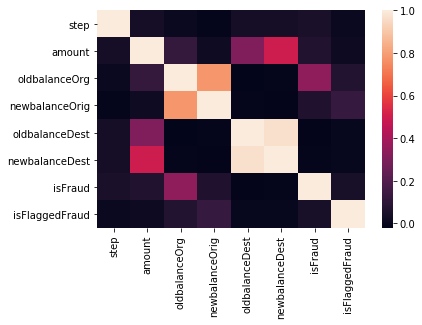

In [6]:
sns.heatmap(trans_data_new.corr())

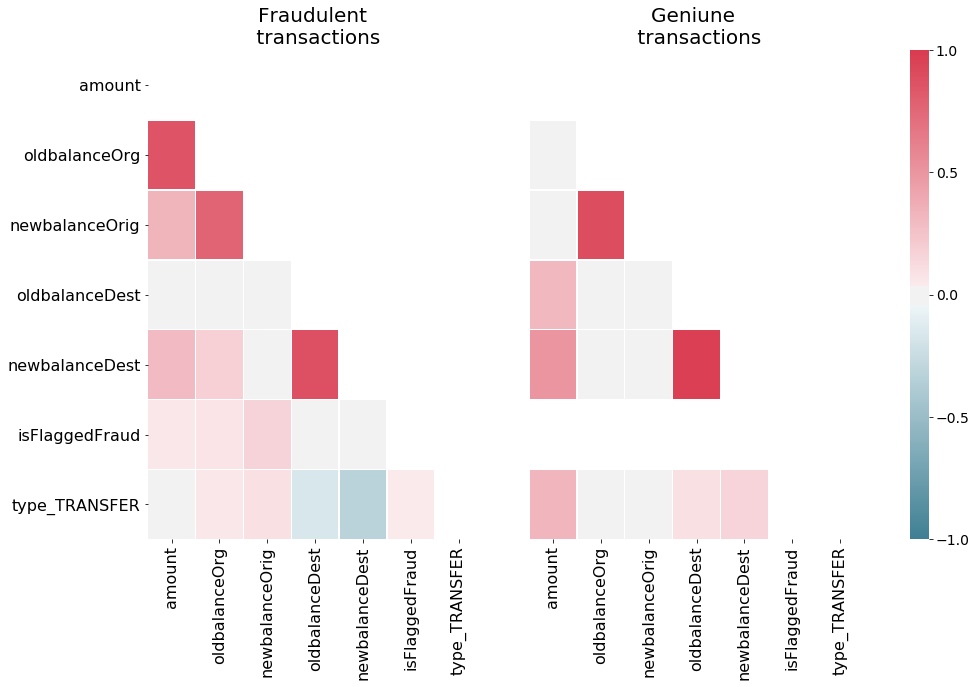

In [5]:

X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

import seaborn as sns
Xfraud = X.loc[y['isFraud']==1] # update Xfraud & XnonFraud with cleaned data
Xnonfraud = X.loc[y['isFraud']==0]
                  
correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationFraud)
indices = np.triu_indices_from(correlationFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Fraudulent \n transactions', size = 20)

correlationnonFraud = Xnonfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationnonFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Geniune \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [7]:
#this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#without applying SMOTE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac = accuracy_score(y_test, y_pred)*100
lr_rs = recall_score(y_test, y_pred)*100
lr_ps = precision_score(y_test, y_pred)*100
lr_fs = f1_score(y_test, y_pred)*100

print('Logistic Regression without applying SMOTE-')
print('Accuracy:',lr_ac,'%')
print('Recall:',lr_rs,'%')
print('Precision:',lr_ps,'%')
print('F1 score:',lr_fs,'%')

#with SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac_sm = accuracy_score(y_test, y_pred)*100
lr_rs_sm = recall_score(y_test, y_pred)*100
lr_ps_sm = precision_score(y_test, y_pred)*100
lr_fs_sm = f1_score(y_test, y_pred)*100

print('Logistic Regression with SMOTE-')
print('Accuracy:',lr_ac_sm,'%')
print('Recall:',lr_rs_sm,'%')
print('Precision:',lr_ps_sm,'%')
print('F1 score:',lr_fs_sm,'%')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression without applying SMOTE-
Accuracy: 99.72840681006525 %
Recall: 72.29705132872223 %
Precision: 53.55987055016181 %
F1 score: 61.53369481022464 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression with SMOTE-
Accuracy: 89.46846270379059 %
Recall: 97.3789588642155 %
Precision: 2.705135206197035 %
F1 score: 5.264038255291096 %


In [8]:
# Random Forest method
# this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# from sklearn.ensemble import RandomForestRegressor
# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# # Train the model on training data
# rf.fit(X_train,y_train);
# y_pred = rf.predict(X_test)

#without applying SMOTE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac = accuracy_score(y_test, y_pred)*100
rf_rs = recall_score(y_test, y_pred)*100
rf_ps = precision_score(y_test, y_pred)*100
rf_fs = f1_score(y_test, y_pred)*100

print('Random Forest Method without applying SMOTE-')
print('Accuracy:',rf_ac,'%')
print('Recall:',rf_rs,'%')
print('Precision:',rf_ps,'%')
print('F1 score:',rf_fs,'%')

#with smote
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac_sm = accuracy_score(y_test, y_pred)*100
rf_rs_sm = recall_score(y_test, y_pred)*100
rf_ps_sm = precision_score(y_test, y_pred)*100
rf_fs_sm = f1_score(y_test, y_pred)*100

print('Random Forest Method with SMOTE-')
print('Accuracy:',rf_ac_sm,'%')
print('Recall:',rf_rs_sm,'%')
print('Precision:',rf_ps_sm,'%')
print('F1 score:',rf_fs_sm,'%')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest Method without applying SMOTE-
Accuracy: 99.92408953934164 %
Recall: 77.13869676010194 %
Precision: 96.97940503432494 %
F1 score: 85.92862935928629 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Method with SMOTE-
Accuracy: 99.83089687006076 %
Recall: 96.32326174008008 %
Precision: 64.6785626986067 %
F1 score: 77.39105001462417 %


In [8]:
# KNN classifier
# this is to get the independent varaibles
from sklearn.model_selection import cross_val_score

X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

#without applying SMOTE
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,15)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train, y_train, cv=10, scoring = 'accuracy')
    k_score.append(score.mean())

print(k_score)
algos = range(1,16)
precisions = np.arange(15)
performance = [k_score[0],k_score[1],k_score[2],k_score[3],k_score[4],k_score[5],k_score[6],k_score[7],k_score[8],k_score[9],k_score[10],k_score[11],k_score[12],k_score[13],k_score[14]] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Accuracy')
plt.title('K_values') 
plt.show()

#  knn_model = KNeighborsClassifier(n_neighbors=3)
#  knn_model.fit(X_train,y_train)
#  y_pred = knn_model.predict(X_test)

# knn_ac = accuracy_score(y_test, y_pred)*100
# knn_rs = recall_score(y_test, y_pred)*100
# knn_ps = precision_score(y_test, y_pred)*100
# knn_fs = f1_score(y_test, y_pred)*100

# print('KNN Method without applying SMOTE-')
# print('Accuracy:',knn_ac,'%')
# print('Recall:',knn_rs,'%')
# print('Precision:',knn_ps,'%')
# print('F1 score:',knn_fs,'%')

# #with SMOTE
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(X_train, y_train)
# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train,y_train)
# y_pred = knn_model.predict(X_test)

# knn_ac_sm = accuracy_score(y_test, y_pred)*100
# knn_rs_sm = recall_score(y_test, y_pred)*100
# knn_ps_sm = precision_score(y_test, y_pred)*100
# knn_fs_sm = f1_score(y_test, y_pred)*100

# print('KNN Method with SMOTE-')
# print('Accuracy:',knn_ac_sm,'%')
# print('Recall:',knn_rs_sm,'%')
# print('Precision:',knn_ps_sm,'%')
# print('F1 score:',knn_fs_sm,'%')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

[0.9986073503739492, 0.998994167616751, 0.9989015038762489, 0.9989844701826799, 0.9989359833519117, 0.9989639979373166, 0.9989402932294092, 0.9989392157593091, 0.9989182048166274, 0.9989289796830663, 0.9989171273378201, 0.9989176660960896, 0.9989117399379788, 0.9989063525062105]


IndexError: list index out of range

In [ ]:
# KNN classifier
# this is to get the independent varaibles
from sklearn.model_selection import cross_val_score

X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)


# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# #with SMOTE
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
smt = SMOTE()

X_train, y_train = smt.fit_sample(X_train, y_train)
from sklearn.neighbors import KNeighborsClassifier
k_range = [2,3,5,7,9]
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train, y_train, cv=10, scoring = 'accuracy')
    k_score.append(score.mean())
print(k_score)
# knn_model.fit(X_train,y_train)
# y_pred = knn_model.predict(X_test)

# knn_ac_sm = accuracy_score(y_test, y_pred)*100
# knn_rs_sm = recall_score(y_test, y_pred)*100
# knn_ps_sm = precision_score(y_test, y_pred)*100
# knn_fs_sm = f1_score(y_test, y_pred)*100

# print('KNN Method with SMOTE-')
# print('Accuracy:',knn_ac_sm,'%')
# print('Recall:',knn_rs_sm,'%')
# print('Precision:',knn_ps_sm,'%')
# print('F1 score:',knn_fs_sm,'%')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1


ValueError: shape mismatch: objects cannot be broadcast to a single shape

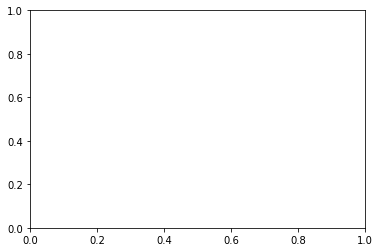

In [20]:
print(k_score.index(max(k_score)))

algos = range(1,14)
precisions = np.arange(15)
performance = [k_score[0],k_score[1],k_score[2],k_score[3],k_score[4],k_score[5],k_score[6],k_score[7],k_score[8],k_score[9],k_score[10],k_score[11],k_score[12],k_score[13]] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Accuracy')
plt.title('K_values') 
plt.show()
plot(k_score)


In [17]:
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

#without applying SMOTE

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

knn_ac = accuracy_score(y_test, y_pred)*100
knn_rs = recall_score(y_test, y_pred)*100
knn_ps = precision_score(y_test, y_pred)*100
knn_fs = f1_score(y_test, y_pred)*100

print('KNN Method without applying SMOTE-')
print('Accuracy:',knn_ac,'%')
print('Recall:',knn_rs,'%')
print('Precision:',knn_ps,'%')
print('F1 score:',knn_fs,'%')

#with SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

knn_ac_sm = accuracy_score(y_test, y_pred)*100
knn_rs_sm = recall_score(y_test, y_pred)*100
knn_ps_sm = precision_score(y_test, y_pred)*100
knn_fs_sm = f1_score(y_test, y_pred)*100

print('KNN Method with SMOTE-')
print('Accuracy:',knn_ac_sm,'%')
print('Recall:',knn_rs_sm,'%')
print('Precision:',knn_ps_sm,'%')
print('F1 score:',knn_fs_sm,'%')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNN Method without applying SMOTE-
Accuracy: 99.8979474642734 %
Recall: 71.89661448853295 %
Precision: 92.4625468164794 %
F1 score: 80.89289371288143 %


NameError: name 'SMOTE' is not defined

In [26]:
#this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#without applying SMOTE
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)*100
xgb_rs = recall_score(y_test, y_pred)*100
xgb_ps = precision_score(y_test, y_pred)*100
xgb_fs = f1_score(y_test, y_pred)*100

print('XGBoost without applying SMOTE-')
print('Accuracy:',xgb_ac,'%')
print('Recall:',xgb_rs,'%')
print('Precision:',xgb_ps,'%')
print('F1 score:',xgb_fs,'%')

#with SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
t.fit_X_train, y_train = smsample(X_train, y_train)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
X_test = X_test.as_matrix()
y_pred = xgb.predict(X_test)

xgb_ac_sm = accuracy_score(y_test, y_pred)*100
xgb_rs_sm = recall_score(y_test, y_pred)*100
xgb_ps_sm = precision_score(y_test, y_pred)*100
xgb_fs_sm = f1_score(y_test, y_pred)*100

print('XGBoost with SMOTE-')
print('Accuracy:',xgb_ac_sm,'%')
print('Recall:',xgb_rs_sm,'%')
print('Precision:',xgb_ps_sm,'%')
print('F1 score:',xgb_fs_sm,'%')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost without applying SMOTE-
Accuracy: 99.9098700006016 %
Recall: 70.98653076083 %
Precision: 98.63429438543247 %
F1 score: 82.5571549534293 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


XGBoost with SMOTE-
Accuracy: 97.24972244554189 %
Recall: 99.381143065162 %
Precision: 9.800050256667983 %
F1 score: 17.840805123513263 %


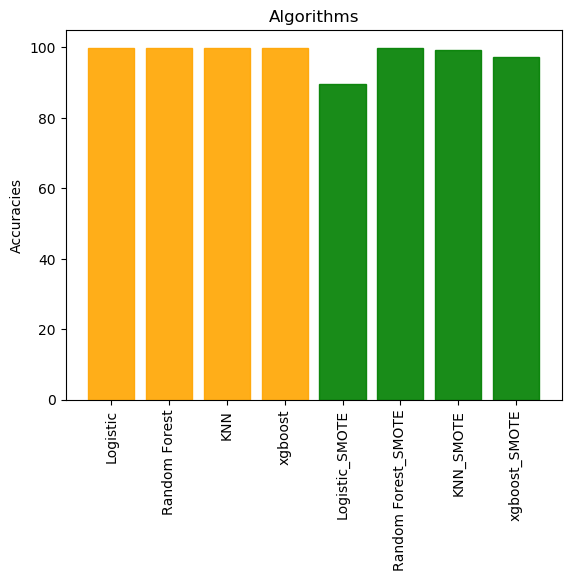

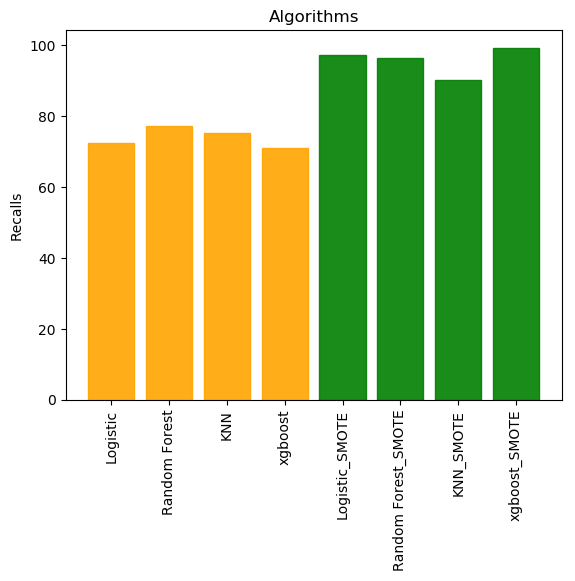

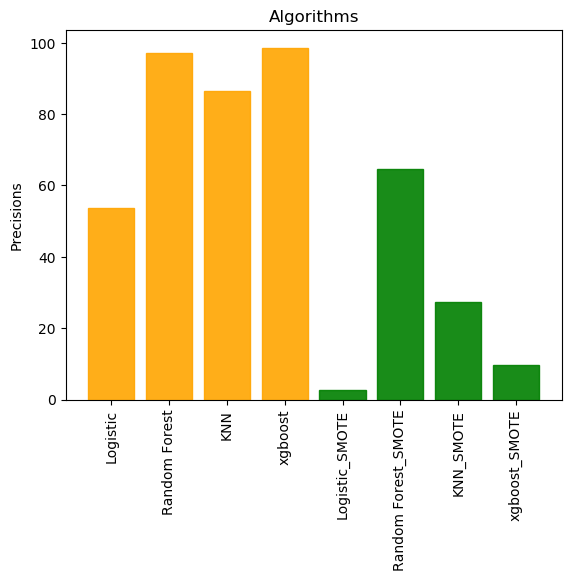

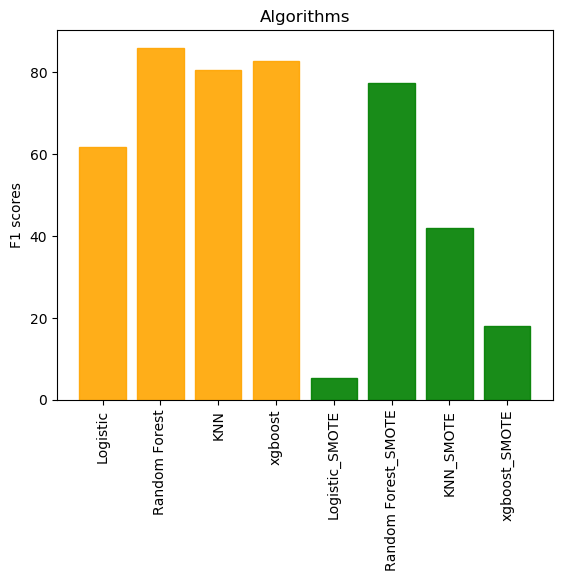

In [44]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
#plotting accuracies    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
accuracies = np.arange(len(algos))
performance = [lr_ac,rf_ac,knn_ac,xgb_ac,lr_ac_sm,rf_ac_sm,knn_ac_sm,xgb_ac_sm] 
bars = plt.bar(accuracies, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(accuracies, algos,rotation='vertical')
plt.ylabel('Accuracies')
plt.title('Algorithms') 
plt.show()

#plotting recall scores    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
recalls = np.arange(len(algos))
performance = [lr_rs,rf_rs,knn_rs,xgb_rs,lr_rs_sm,rf_rs_sm,knn_rs_sm,xgb_rs_sm] 
bars = plt.bar(recalls, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(recalls, algos,rotation='vertical')
plt.ylabel('Recalls')
plt.title('Algorithms') 
plt.show()

#plotting precisions    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
precisions = np.arange(len(algos))
performance = [lr_ps,rf_ps,knn_ps,xgb_ps,lr_ps_sm,rf_ps_sm,knn_ps_sm,xgb_ps_sm] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Precisions')
plt.title('Algorithms') 
plt.show()

#plotting F1 scores    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
fscores = np.arange(len(algos))
performance = [lr_fs,rf_fs,knn_fs,xgb_fs,lr_fs_sm,rf_fs_sm,knn_fs_sm,xgb_fs_sm] 
bars = plt.bar(fscores, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(fscores, algos,rotation='vertical')
plt.ylabel('F1 scores')
plt.title('Algorithms') 
plt.show()